In [4]:
import pandas as pd
import nltk
from textblob import TextBlob
import sys 
import os 
# Add the parent directory to the Python path 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.load_align import load_and_align_data

# Download necessary NLTK data
nltk.download('punkt')


Number of NaT in stock_df: 0
Number of NaT in news_df: 0
Final Stock Date type: datetime64[ns]
Final News Date type: datetime64[ns]
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2  

[nltk_data] Downloading package punkt to /home/enat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Paths to stock and news files
stock_file_path = '../Data/yfinance_data/AMZN_historical_data.csv'
news_file_path = '../Data/raw_analyst_ratings.csv'
output_file_path = '../Data/merged_data.csv' 


In [6]:
# Load and merge the data
merged_df = load_and_align_data(stock_file_path, news_file_path, output_file_path)

# Display the first few rows of the merged DataFrame
print(merged_df.head())


Number of NaT in stock_df: 0
Number of NaT in news_df: 0
Final Stock Date type: datetime64[ns]
Final News Date type: datetime64[ns]
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2  

In [7]:
# Perform sentiment analysis on news headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to the 'headline' column
merged_df['Sentiment_Polarity'], merged_df['Sentiment_Subjectivity'] = zip(*merged_df['headline'].apply(analyze_sentiment))

# Display the DataFrame with sentiment analysis
print(merged_df[['Date', 'headline', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())


        Date                                           headline  \
0 2009-04-27      Update on the Luxury Sector: 2nd Quarter 2009   
1 2009-04-27      Update on the Luxury Sector: 2nd Quarter 2009   
2 2009-04-29                             Going Against the Herd   
3 2009-05-22  Charles Sizemore Radio Interview Saturday Morning   
4 2009-05-27  MRM a $15-$20+ stock - FIT new information - J...   

   Sentiment_Polarity  Sentiment_Subjectivity  
0            0.000000                0.000000  
1            0.000000                0.000000  
2            0.000000                0.000000  
3            0.000000                0.000000  
4            0.268182                0.427273  


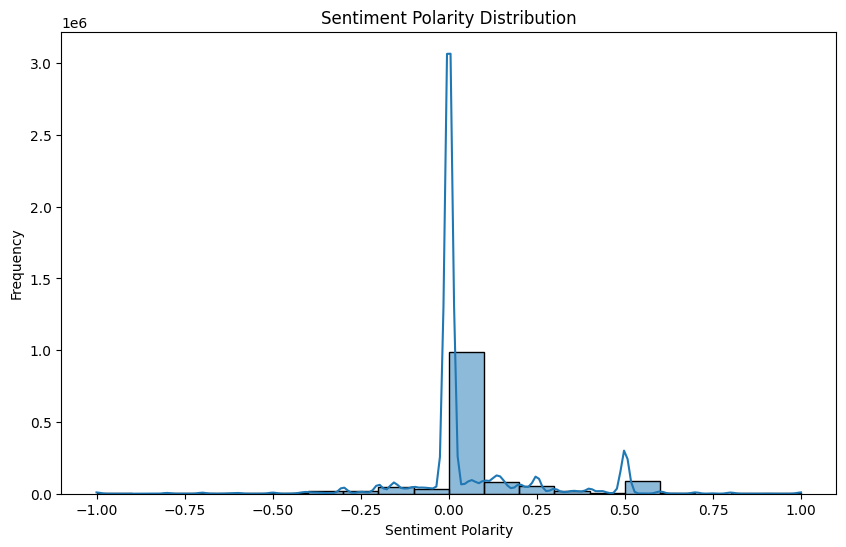

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
# Visualize Sentiment Polarity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


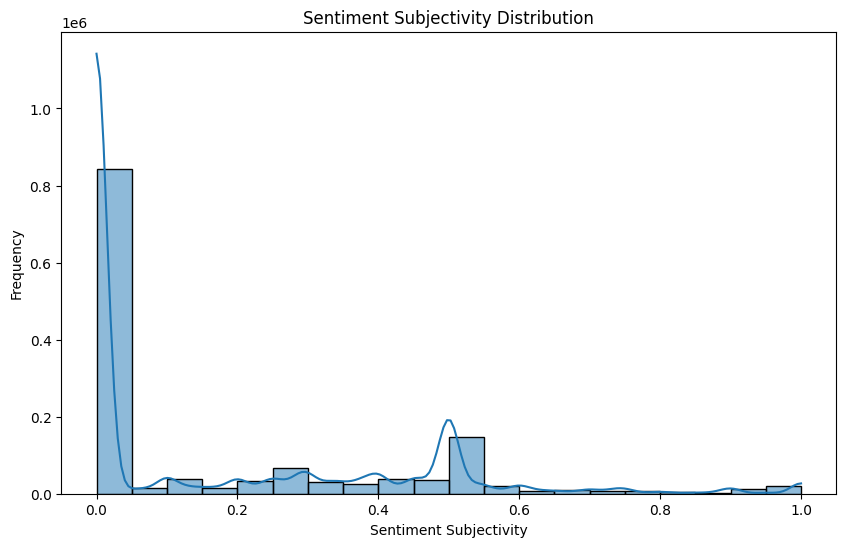

In [9]:
# Visualize Sentiment Subjectivity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Sentiment_Subjectivity'], bins=20, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()


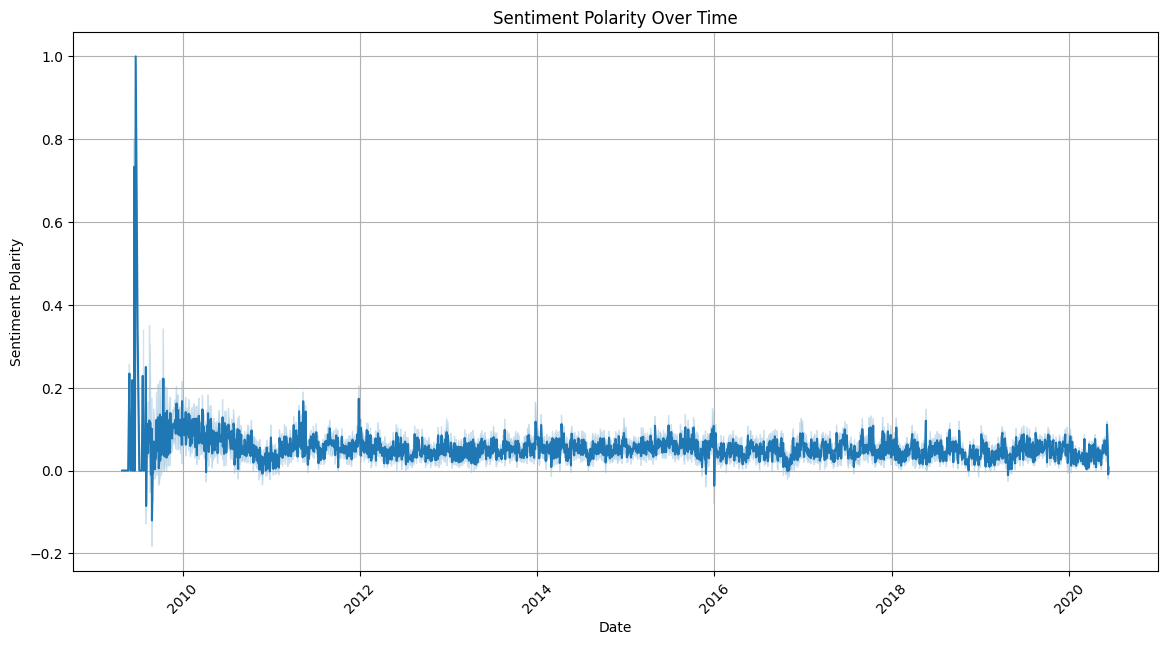

In [10]:
# Visualize Sentiment Polarity over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='Date', y='Sentiment_Polarity')
plt.title('Sentiment Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
